# Title: comprehensive price analysis of flats, apartments, and villas based on their respective locations in Hyderabad

# Abstract

The real estate market is a dynamic and complex industry where property prices vary significantly based on location. This analysis aims to explore the relationship between property types (flats, apartments, and villas) and their prices in different locations. By analyzing historical property data, we can gain insights into how location affects property prices and help potential buyers, sellers, and investors make informed decisions.

# Introduction

In the real estate market, property prices are influenced by a multitude of factors, with location being a primary determinant. This analysis focuses on examining the correlation between property types and their prices across different regions using data sourced from the Makaan website.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests
from selenium import webdriver

In [2]:
url="https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city"
page=requests.get(url)
page

<Response [200]>

# web scraping from the Makaan website

In [2]:
price=[]
Type_of_BHK=[]
area=[]
construction_status=[]
Facing=[]
Location=[]
TypeOfHouse=[]
a=[50375,51943,50376,51242,51238,51957,53034,51240,51541,51963]
for j in a:
    for i in range(1,11):
        url=f"https://www.makaan.com/hyderabad-property/gachibowli-flats-for-sale-{j}?page={i}"
        page=requests.get(url)
        soup=BeautifulSoup(page.text)
        container=soup.find_all("li",class_="cardholder")
        for i in container:
            a=i.find("td",class_="price")
            if a:
                price.append(a.text)
            else:
                price.append(np.nan)
        for i in container:
            i.find("div",class_="title-line-wrap")
            reg=re.findall("(\d\sBHK)",i.text)       
            if reg:
                Type_of_BHK.append(reg[0])
            else:
                Type_of_BHK.append(np.nan)
        for i in container:
            i.find("div",class_="title-line-wrap")
            reg=re.findall("((?:Manikonda|Gachibowli|Nizampet|Kukatpally|Attapur|LB Nagar|Ameerpet|Kondapur|Jubilee Hills|Nanakramguda))",i.text)       
            if reg:
                Location.append(reg[0])
            else:
                Location.append(np.nan)
        for i in container:
            i.find("div",class_="title-line-wrap")
            reg=re.findall("((?:Apartment|Villa|Independent|Flat))",i.text)       
            if reg:
                TypeOfHouse.append(reg[0])
            else:
                TypeOfHouse.append(np.nan)
        for i in container:
            a=i.find("td",class_="size")
            if a:
                area.append(a.text)
            else:
                area.append(np.nan)
        for i in container:
            a=i.find("td",class_="val")
            if a:
                construction_status.append(a.text)
            else:
                construction_status.append(np.nan)
        for i in container:
            i.find("ul",class_="listing-details")
            reg=re.findall("(\w+\sfacing)",i.text)
            if reg:
                Facing.append(reg[0])
            else:
                Facing.append(np.nan)

In [3]:
print(len(TypeOfHouse))
print(len(construction_status))
print(len(Facing))
print(len(Type_of_BHK))
print(len(area))
print(len(price))
print(len(Location))

1776
1776
1776
1776
1776
1776
1776


# Above DataFrame save it into csv_file

In [4]:
FlatsData={"TypeOfHouse":TypeOfHouse,
           "Construction_status":construction_status,
           "Facing":Facing,
           "Type_of_BHK":Type_of_BHK,
           "Area_Sq_ft":area,
           "Price_in_Lakhs":price,
           "Location":Location}  
df=pd.DataFrame(FlatsData)

In [5]:
df=df.dropna()

In [6]:
len(df)

777

In [23]:
#df.to_csv("DA_REALESTATE_Project.csv")

In [24]:
#df.to_excel("DA_REALESTATE_Project.xlsx")

In [2]:
df1=pd.read_csv("DA_REALESTATE_Project.csv")
df1=df1.drop(["Unnamed: 0"],axis=1)
df1

,TypeOfHouse,Construction_status,Facing,Type_of_BHK,Area_Sq_ft,Price_in_Lakhs,Location
0,Villa,Under Construction,East facing,4 BHK,3940,2.33 Cr,Gachibowli
1,Apartment,Under Construction,East facing,3 BHK,2270,2.02 Cr,Gachibowli
2,Apartment,Under Construction,East facing,3 BHK,1721,1.2 Cr,Gachibowli
3,Apartment,Under Construction,East facing,3 BHK,1896,87 L,Gachibowli
4,Apartment,Under Construction,East facing,3 BHK,1565,76 L,Gachibowli
...,...,...,...,...,...,...,...
780,Apartment,Under Construction,East facing,3 BHK,1400,77 L,Nanakramguda
781,Apartment,Under Construction,East facing,2 BHK,1147,71.1 L,Nanakramguda
782,Apartment,Under Construction,East facing,3 BHK,1610,1.04 Cr,Nanakramguda
783,Apartment,Under Construction,East facing,3 BHK,1610,1.04 Cr,Nanakramguda


# Data Cleaning

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TypeOfHouse          785 non-null    object
 1   Construction_status  785 non-null    object
 2   Facing               785 non-null    object
 3   Type_of_BHK          785 non-null    object
 4   Area_Sq_ft           785 non-null    int64 
 5   Price_in_Lakhs       785 non-null    object
 6   Location             785 non-null    object
dtypes: int64(1), object(6)
memory usage: 43.1+ KB


In [4]:
df1["Facing"].replace({"east facing":"East facing","south facing":"South facing","west facing":"West facing"},regex=True,inplace=True)

In [5]:
# Checking the missing values 
df1.isnull().sum()

TypeOfHouse            0
Construction_status    0
Facing                 0
Type_of_BHK            0
Area_Sq_ft             0
Price_in_Lakhs         0
Location               0
dtype: int64

In [6]:
type(df1.Type_of_BHK.isnull().sum())

numpy.int64

In [7]:
type(df1.Location.isnull().sum()) 

numpy.int64

In [8]:
type(df1.Price_in_Lakhs.isnull().sum())

numpy.int64

In [9]:
type(df1.Area_Sq_ft[0])

numpy.int64

In [10]:
df1=df1[(df1.Facing!="is facing")]
df1.reset_index(drop=True,inplace=True)

In [11]:
df1["Price_in_Lakhs"]=df1["Price_in_Lakhs"].replace({"L":"*1","Cr":"*1e2"},regex=True).map(pd.eval).astype(int)
df1

C:\Users\Hi\AppData\Local\Temp\ipykernel_15084\3767426782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Price_in_Lakhs"]=df1["Price_in_Lakhs"].replace({"L":"*1","Cr":"*1e2"},regex=True).map(pd.eval).astype(int)


,TypeOfHouse,Construction_status,Facing,Type_of_BHK,Area_Sq_ft,Price_in_Lakhs,Location
0,Villa,Under Construction,East facing,4 BHK,3940,233,Gachibowli
1,Apartment,Under Construction,East facing,3 BHK,2270,202,Gachibowli
2,Apartment,Under Construction,East facing,3 BHK,1721,120,Gachibowli
3,Apartment,Under Construction,East facing,3 BHK,1896,87,Gachibowli
4,Apartment,Under Construction,East facing,3 BHK,1565,76,Gachibowli
...,...,...,...,...,...,...,...
740,Apartment,Under Construction,East facing,3 BHK,1400,77,Nanakramguda
741,Apartment,Under Construction,East facing,2 BHK,1147,71,Nanakramguda
742,Apartment,Under Construction,East facing,3 BHK,1610,104,Nanakramguda
743,Apartment,Under Construction,East facing,3 BHK,1610,104,Nanakramguda


In [12]:
df1.Price_in_Lakhs.head(20)

0     233
1     202
2     120
3      87
4      76
5     112
6     100
7     100
8      90
9     136
10     71
11    181
12     82
13     65
14     60
15     65
16     34
17    141
18    145
19    200
Name: Price_in_Lakhs, dtype: int32

In [13]:
df1.Facing.value_counts()

East facing         492
West facing         144
North facing         43
NorthEast facing     29
South facing         11
NorthWest facing     11
road facing           6
SouthWest facing      5
garden facing         2
SouthEast facing      1
pool facing           1
Name: Facing, dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TypeOfHouse          745 non-null    object
 1   Construction_status  745 non-null    object
 2   Facing               745 non-null    object
 3   Type_of_BHK          745 non-null    object
 4   Area_Sq_ft           745 non-null    int64 
 5   Price_in_Lakhs       745 non-null    int32 
 6   Location             745 non-null    object
dtypes: int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [15]:
PriceRange=[]
for i in df1["Price_in_Lakhs"]:
    if i<150:
        PriceRange.append("Low")
    elif (i>150) & (i<350):
        PriceRange.append("Medium")
    elif(i>350) & (i<500):
        PriceRange.append("High")
    else:
        PriceRange.append("Very High")
df1["PriceRange"]=PriceRange

C:\Users\Hi\AppData\Local\Temp\ipykernel_15084\2904093236.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["PriceRange"]=PriceRange


In [16]:
df1

,TypeOfHouse,Construction_status,Facing,Type_of_BHK,Area_Sq_ft,Price_in_Lakhs,Location,PriceRange
0,Villa,Under Construction,East facing,4 BHK,3940,233,Gachibowli,Medium
1,Apartment,Under Construction,East facing,3 BHK,2270,202,Gachibowli,Medium
2,Apartment,Under Construction,East facing,3 BHK,1721,120,Gachibowli,Low
3,Apartment,Under Construction,East facing,3 BHK,1896,87,Gachibowli,Low
4,Apartment,Under Construction,East facing,3 BHK,1565,76,Gachibowli,Low
...,...,...,...,...,...,...,...,...
740,Apartment,Under Construction,East facing,3 BHK,1400,77,Nanakramguda,Low
741,Apartment,Under Construction,East facing,2 BHK,1147,71,Nanakramguda,Low
742,Apartment,Under Construction,East facing,3 BHK,1610,104,Nanakramguda,Low
743,Apartment,Under Construction,East facing,3 BHK,1610,104,Nanakramguda,Low


In [17]:
df1.head(25)

,TypeOfHouse,Construction_status,Facing,Type_of_BHK,Area_Sq_ft,Price_in_Lakhs,Location,PriceRange
0,Villa,Under Construction,East facing,4 BHK,3940,233,Gachibowli,Medium
1,Apartment,Under Construction,East facing,3 BHK,2270,202,Gachibowli,Medium
2,Apartment,Under Construction,East facing,3 BHK,1721,120,Gachibowli,Low
3,Apartment,Under Construction,East facing,3 BHK,1896,87,Gachibowli,Low
4,Apartment,Under Construction,East facing,3 BHK,1565,76,Gachibowli,Low
5,Apartment,Under Construction,East facing,2 BHK,1600,112,Gachibowli,Low
6,Independent,Ready to move,South facing,1 BHK,1500,100,Gachibowli,Low
7,Apartment,Under Construction,East facing,3 BHK,1500,100,Gachibowli,Low
8,Apartment,Under Construction,East facing,3 BHK,1500,90,Gachibowli,Low
9,Apartment,Under Construction,East facing,3 BHK,1945,136,Gachibowli,Low


In [18]:
df1.to_csv("project_cleaned_data.csv")
df1

,TypeOfHouse,Construction_status,Facing,Type_of_BHK,Area_Sq_ft,Price_in_Lakhs,Location,PriceRange
0,Villa,Under Construction,East facing,4 BHK,3940,233,Gachibowli,Medium
1,Apartment,Under Construction,East facing,3 BHK,2270,202,Gachibowli,Medium
2,Apartment,Under Construction,East facing,3 BHK,1721,120,Gachibowli,Low
3,Apartment,Under Construction,East facing,3 BHK,1896,87,Gachibowli,Low
4,Apartment,Under Construction,East facing,3 BHK,1565,76,Gachibowli,Low
...,...,...,...,...,...,...,...,...
740,Apartment,Under Construction,East facing,3 BHK,1400,77,Nanakramguda,Low
741,Apartment,Under Construction,East facing,2 BHK,1147,71,Nanakramguda,Low
742,Apartment,Under Construction,East facing,3 BHK,1610,104,Nanakramguda,Low
743,Apartment,Under Construction,East facing,3 BHK,1610,104,Nanakramguda,Low


# Data Visualization

In [19]:
df1.columns

Index(['TypeOfHouse', 'Construction_status', 'Facing', 'Type_of_BHK',
       'Area_Sq_ft', 'Price_in_Lakhs', 'Location', 'PriceRange'],
      dtype='object')

# Univariate analysis

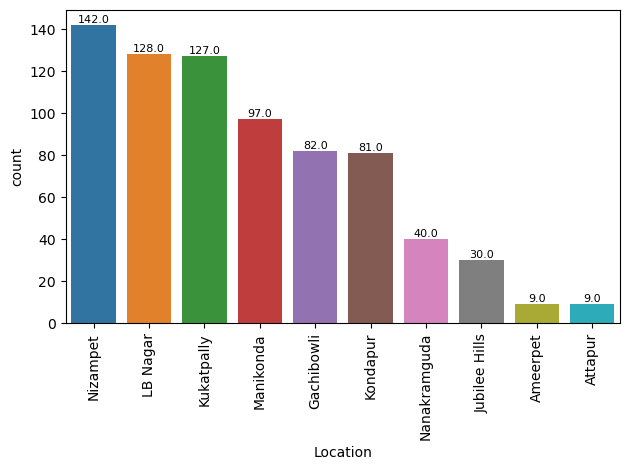

In [20]:
a=sns.countplot(x="Location",data=df1,order=df1["Location"].value_counts().index)
plt.xticks(rotation=90)
for p in a.patches:
    a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.show()

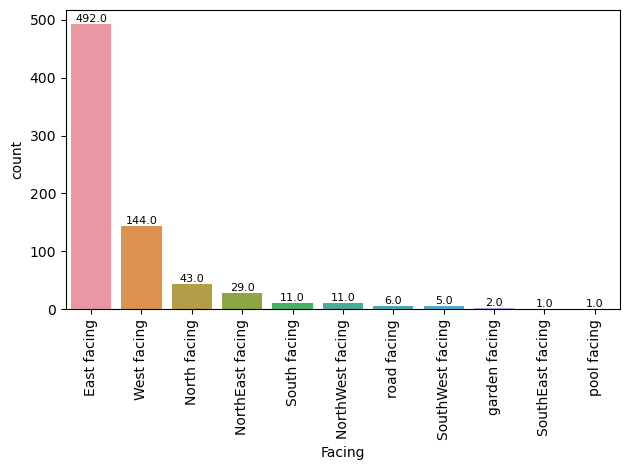

In [21]:
a=sns.countplot(x="Facing",data=df1,order=df1["Facing"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Facing")
for p in a.patches:
    a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.show()

we observed that most of the Apartment/Villa/Independent House are in East side facing followed by west side facing.It indicates that most of the peoples preferring east facing houses.

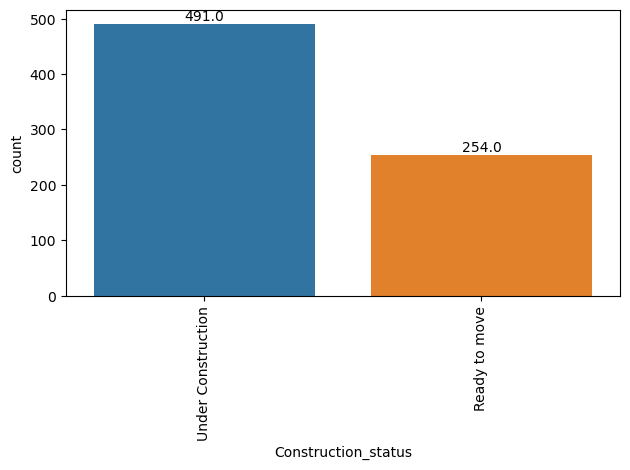

In [22]:
a=sns.countplot(x="Construction_status",data=df1,order=df1["Construction_status"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Construction_status")
for p in a.patches:
    a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

In the above bar plot it is showing that the Under construction houses are more when compared to Ready to move.

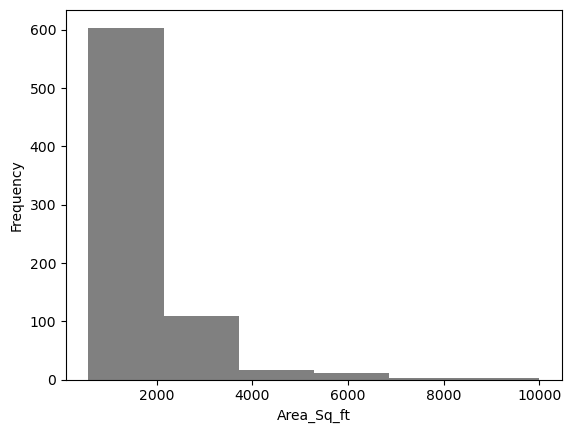

In [23]:
df1["Area_Sq_ft"].plot(kind="hist",bins=6,color="Grey")
plt.xlabel("Area_Sq_ft")
plt.show()

In the above plot it is showing that most of the houses areas is lies between 700 to 3000 sq_ft

# bivariate Analysis

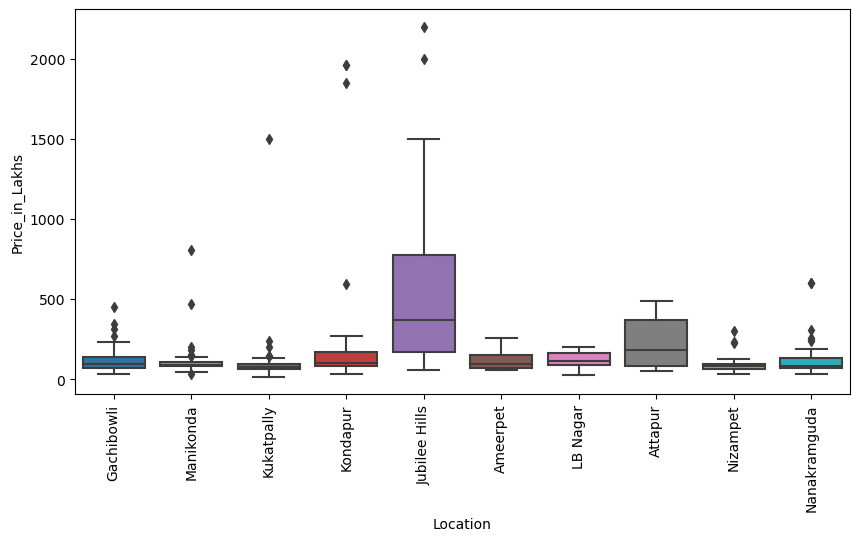

In [23]:
fig = plt.subplots(figsize=(10,5))
sns.boxplot(x='Location', y='Price_in_Lakhs', data=df1)
plt.xticks(rotation=90)
plt.show()

Based on the location in jubliee hills the Apartment/Villa/Independent house prices are very high when compared to the other locations followed by Attapur.  

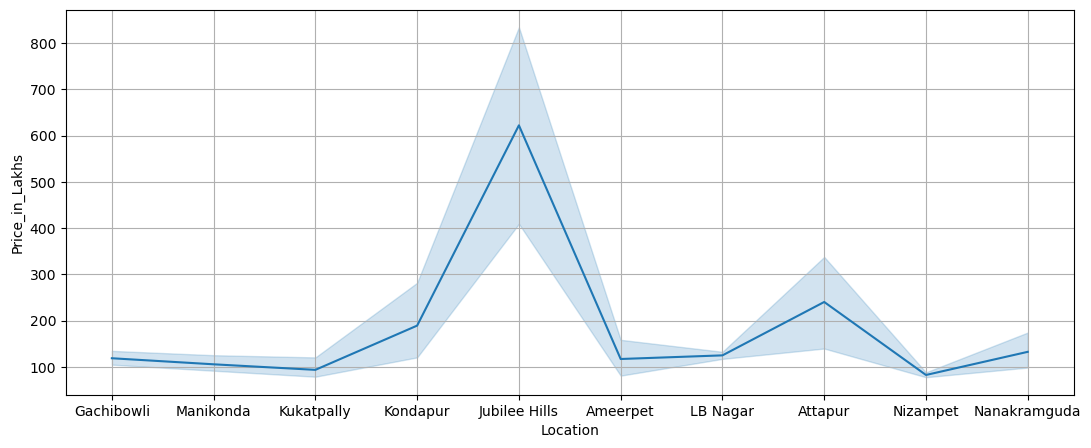

In [24]:
fig = plt.subplots(figsize=(13,5))
sns.lineplot(x='Location', y='Price_in_Lakhs', data=df1)
plt.grid()

<Figure size 2000x600 with 0 Axes>

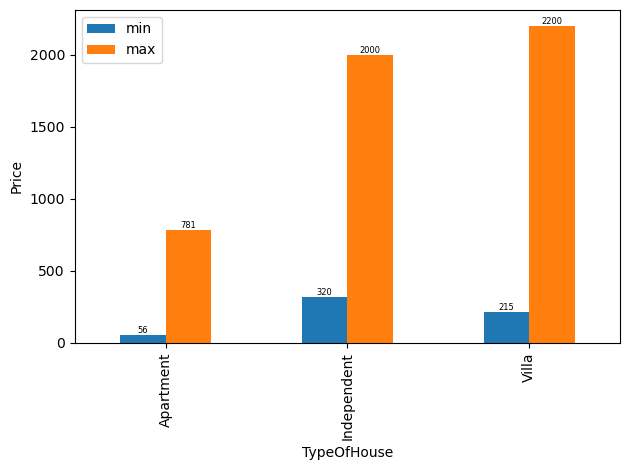

In [25]:
plt.figure(figsize=(20, 6))
df2=df1[(df1["Location"]=="Jubilee Hills")]

ax=df2.groupby("TypeOfHouse")["Price_in_Lakhs"].agg([min,max]).plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("TypeOfHouse")
plt.ylabel('Price')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=6, color='black')
plt.tight_layout()
plt.show()

Above plot represents the minumum and maximum prices of Apartment,Villa and Independent house in the jubilee hills location.

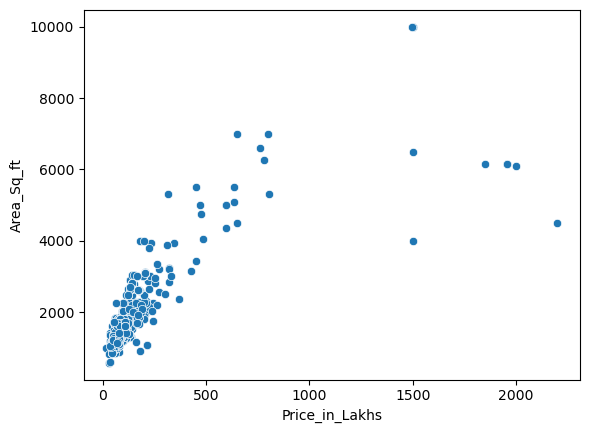

In [28]:
sns.scatterplot(x="Price_in_Lakhs",y="Area_Sq_ft",data=df1)
plt.show()

By the above plot we observed that if the area_sq_ft increases then the price of the Apartment/Villa/Independent House is also increases simultaneously.

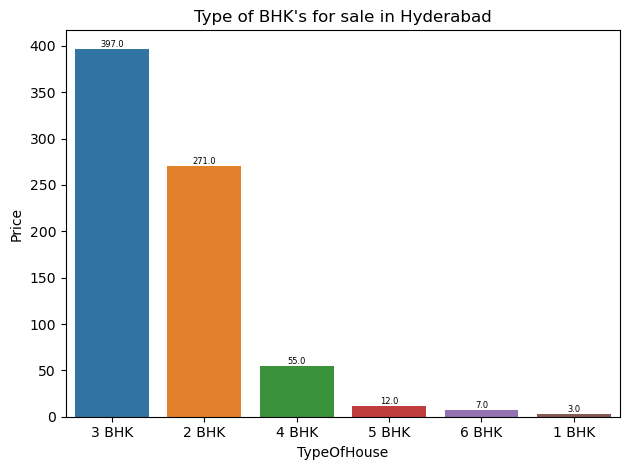

In [25]:
ax=sns.countplot(x="Type_of_BHK",data=df1,order=df1["Type_of_BHK"].value_counts().index)
plt.xlabel("TypeOfHouse")
plt.ylabel('Price')
plt.title("Type of BHK's for sale in Hyderabad")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=6, color='black')
plt.tight_layout()
plt.show()

# Minimum and maximum price based on the locaion 

<Figure size 2000x600 with 0 Axes>

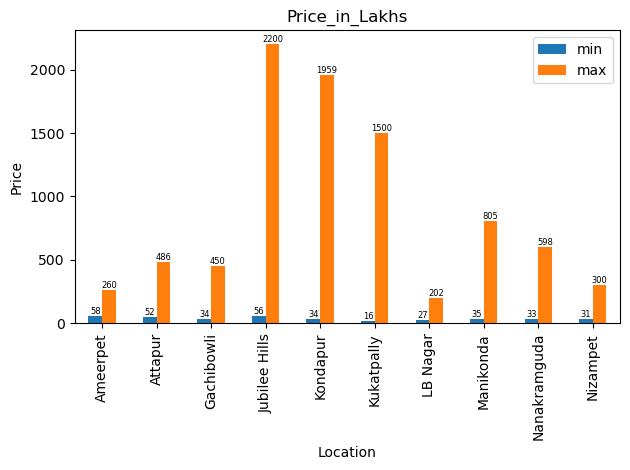

In [29]:
plt.figure(figsize=(20, 6))
ax=df1.groupby("Location")["Price_in_Lakhs"].agg([min,max]).plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel('Price')
plt.title('Price_in_Lakhs')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=6, color='black')
plt.tight_layout()
plt.show()

# Minimum and Maximum price based on the Facing

<Figure size 2000x600 with 0 Axes>

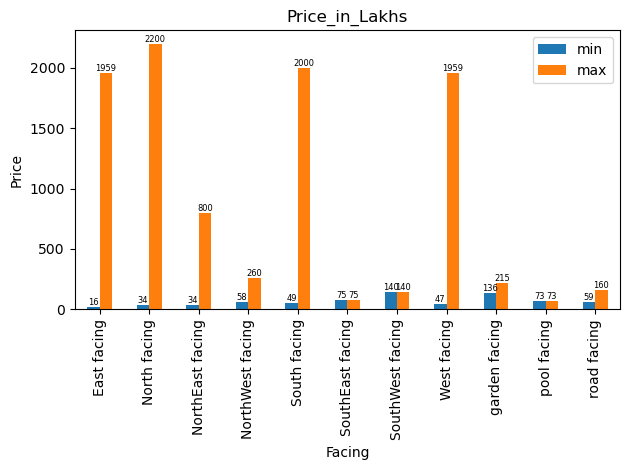

In [30]:
plt.figure(figsize=(20, 6))
ax=df1.groupby("Facing")["Price_in_Lakhs"].agg(["min","max"]).plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Facing")
plt.ylabel('Price')
plt.title('Price_in_Lakhs')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=6, color='black')
plt.tight_layout()
plt.show()

In [31]:
df1.groupby("Type_of_BHK")["Price_in_Lakhs"].agg(["min","max","mean"])

,min,max,mean
Type_of_BHK,,,
1 BHK,34,100,56.000000
2 BHK,16,180,71.955720
3 BHK,34,425,115.914358
4 BHK,100,2000,322.654545
5 BHK,450,2200,1037.083333
6 BHK,165,1500,880.285714


# Multivariate analysis

In [32]:
crosstab1=pd.crosstab(df1["Price_in_Lakhs"],df1["Type_of_BHK"])
crosstab1

Type_of_BHK,1 BHK,2 BHK,3 BHK,4 BHK,5 BHK,6 BHK
Price_in_Lakhs,,,,,,
16,0,1,0,0,0,0
27,0,1,0,0,0,0
31,0,1,0,0,0,0
33,0,1,0,0,0,0
34,2,1,1,0,0,0
...,...,...,...,...,...,...
1500,0,0,0,1,1,1
1848,0,0,0,1,0,0
1959,0,0,0,0,2,0


In [28]:
crosstab=pd.crosstab(df1["Type_of_BHK"],df1["Location"])
crosstab

Location,Ameerpet,Attapur,Gachibowli,Jubilee Hills,Kondapur,Kukatpally,LB Nagar,Manikonda,Nanakramguda,Nizampet
Type_of_BHK,,,,,,,,,,
1 BHK,0,0,1,0,0,1,0,0,0,1
2 BHK,5,1,26,2,28,64,26,30,20,69
3 BHK,3,4,46,12,46,57,81,61,16,71
4 BHK,1,1,9,7,5,5,20,4,2,1
5 BHK,0,1,0,5,2,0,0,2,2,0
6 BHK,0,2,0,4,0,0,1,0,0,0


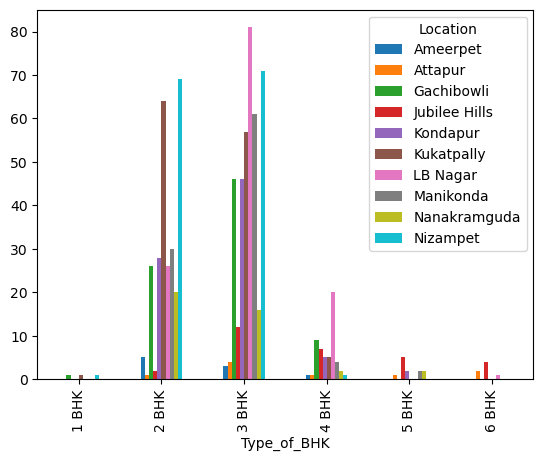

In [29]:
crosstab.plot(kind="bar")
plt.show()

C:\Users\Hi\AppData\Local\Temp\ipykernel_15084\3199766028.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),cmap="BuPu",annot=True)       #"Blue to Purple(BuPu)


<Axes: >

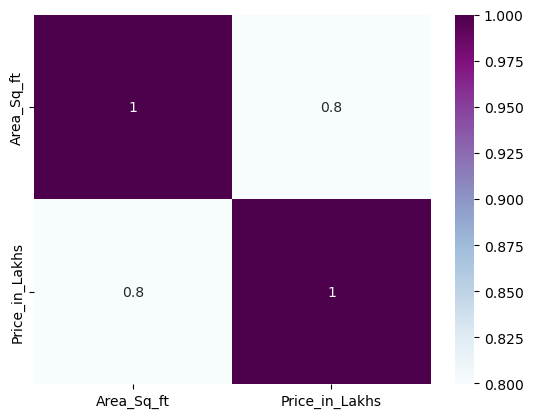

In [30]:
sns.heatmap(df1.corr(),cmap="BuPu",annot=True)       #"Blue to Purple(BuPu)

We can observe that,there is a strong correlation between the 
Price and Area sqft with a  extinction of 0.8

# Conclusion

This analysis will contribute to a better understanding of how location impacts property prices for different types of properties. The findings can guide buyers, sellers, and investors in making informed decisions. Additionally, the analysis can serve as a basis for further research on the dynamic nature of real estate markets and their response to changing economic conditions.